# COMP30760 Assignment 1 - Task 2 | 20456362

In Task 1 we collected data on suicde rates worlwide.

This notebook covers Task 2 - Data Preparation and Analysis. We will use all of the JSON data collected during Task 1 to perform the analysis process.

In [1853]:
import json
from pathlib import Path
from datetime import datetime
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

Directories for data storage:

In [1854]:
# directory for raw data storage
dir_raw = Path("raw")
# directory for storing clean pre-processed data
dir_data = Path("data")
# make sure it exists
dir_data.mkdir(parents=True, exist_ok=True)

## Data Preprocessing 

Before we can analyse the data, we need to transform it into a usable format. In this case we will load data into a list of dictionaries. 

In [1855]:
# read in from  our raw dataset directory 
in_path = dir_raw / "suicide_rates.json"

with open(in_path, "r") as file_object:  
    raw_data = json.load(file_object)  

# verify raw data has been successfully read in by checking the size 
# against size of same dataset in Task 1    
print("Length of raw data = ", len(raw_data))
raw_data[17678]

Length of raw data =  17679


{'Id': 26307652,
 'IndicatorCode': 'SDGSUICIDE',
 'SpatialDimType': 'COUNTRY',
 'SpatialDim': 'ZWE',
 'TimeDimType': 'YEAR',
 'TimeDim': 2019,
 'Dim1Type': 'SEX',
 'Dim1': 'MLE',
 'Dim2Type': 'AGEGROUP',
 'Dim2': 'YEARS30-49',
 'Dim3Type': None,
 'Dim3': None,
 'DataSourceDimType': None,
 'DataSourceDim': None,
 'Value': '37.0',
 'NumericValue': 37.03,
 'Low': None,
 'High': None,
 'Comments': None,
 'Date': '2021-07-16T09:31:37.29+02:00',
 'TimeDimensionValue': '2019',
 'TimeDimensionBegin': '2019-01-01T00:00:00+01:00',
 'TimeDimensionEnd': '2019-12-31T00:00:00+01:00',
 'Country': 'Zimbabwe',
 'Region': 'Africa'}

### Data Cleansing and Filtration 

Now we can start cleansing all the redundant pieces of data. 

Before we turn our data into a Pandas df, we have some data categorised by country's GNI (Gross National Income) per captia. We will add the meaning of the abbreviations(in 'SpatialDim') to the 'Region' using a dict.

Make dict for all economy types:

In [1856]:
# dictionary for World Bank Income Abbreviations 
dict_WB = {"WB_HI":"High-income economies", "WB_LI":"Low-income economies",
          "WB_LMI":"Lower-middle-income economies", "WB_UMI":"Upper-middle-income economies"}

Add economy type to Region column and "GNI" to Specification(Dim2Type) column:

In [1857]:
for x in range(len(raw_data)):
    # if SpatialDim is in dict then change Specification to GNI and Region to economy type 
    if raw_data[x]["SpatialDim"] in dict_WB:
        raw_data[x]["Region"] = dict_WB.get(raw_data[x]["SpatialDim"])
        raw_data[x]["Dim2Type"] = "GNI per capita"

# print out example 
raw_data[11515]

{'Id': 25429853,
 'IndicatorCode': 'SDGSUICIDE',
 'SpatialDimType': 'WORLDBANKINCOMEGROUP',
 'SpatialDim': 'WB_UMI',
 'TimeDimType': 'YEAR',
 'TimeDim': 2012,
 'Dim1Type': 'SEX',
 'Dim1': 'FMLE',
 'Dim2Type': 'GNI per capita',
 'Dim2': None,
 'Dim3Type': None,
 'Dim3': None,
 'DataSourceDimType': None,
 'DataSourceDim': None,
 'Value': '5.6 [4.8-6.8]',
 'NumericValue': 5.62,
 'Low': 4.82,
 'High': 6.82,
 'Comments': None,
 'Date': '2021-02-09T17:28:03.937+01:00',
 'TimeDimensionValue': '2012',
 'TimeDimensionBegin': '2012-01-01T00:00:00+01:00',
 'TimeDimensionEnd': '2012-12-31T00:00:00+01:00',
 'Country': None,
 'Region': 'Upper-middle-income economies'}

 We will turn our raw data into a Pandas dataframe and proceed:

In [1858]:
df_raw = pd.DataFrame(raw_data)
# initial dataframe
df_raw

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,...,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Country,Region
0,25258018,SDGSUICIDE,COUNTRY,AFG,YEAR,2010,SEX,FMLE,None,None,...,3.88,2.26,6.23,None,2021-02-09T16:20:16.383+01:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00,Afghanistan,Eastern Mediterranean
1,25258019,SDGSUICIDE,COUNTRY,AFG,YEAR,2004,SEX,BTSX,None,None,...,5.03,2.89,8.22,None,2021-02-09T16:20:16.413+01:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00,Afghanistan,Eastern Mediterranean
2,25258020,SDGSUICIDE,COUNTRY,AFG,YEAR,2007,SEX,BTSX,None,None,...,4.80,2.78,7.86,None,2021-02-09T16:20:16.43+01:00,2007,2007-01-01T00:00:00+01:00,2007-12-31T00:00:00+01:00,Afghanistan,Eastern Mediterranean
3,25258021,SDGSUICIDE,COUNTRY,AFG,YEAR,2001,SEX,MLE,None,None,...,5.22,2.93,8.65,None,2021-02-09T16:20:16.46+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,Afghanistan,Eastern Mediterranean
4,25258022,SDGSUICIDE,COUNTRY,AFG,YEAR,2001,SEX,FMLE,None,None,...,4.84,2.79,7.77,None,2021-02-09T16:20:16.8+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,Afghanistan,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17674,26307648,SDGSUICIDE,COUNTRY,ZMB,YEAR,2019,SEX,FMLE,AGEGROUP,YEARS30-49,...,4.22,NaN,NaN,None,2021-07-16T09:31:37.197+02:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Zambia,Africa
17675,26307649,SDGSUICIDE,COUNTRY,ZMB,YEAR,2019,SEX,MLE,AGEGROUP,YEARS30-49,...,24.94,NaN,NaN,None,2021-07-16T09:31:37.227+02:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Zambia,Africa
17676,26307650,SDGSUICIDE,COUNTRY,ZWE,YEAR,2019,SEX,BTSX,AGEGROUP,YEARS30-49,...,26.03,NaN,NaN,None,2021-07-16T09:31:37.243+02:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Zimbabwe,Africa
17677,26307651,SDGSUICIDE,COUNTRY,ZWE,YEAR,2019,SEX,FMLE,AGEGROUP,YEARS30-49,...,17.04,NaN,NaN,None,2021-07-16T09:31:37.273+02:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Zimbabwe,Africa


#### Deletions 

We will not need to delete any rows from our dataframe. <b>Some rows have empty columns (value = None) but that is only because that column is not applicable to that record of data.</b> 

To <b>verify</b>, check if we have duplicate or empty rows. 

In [1859]:
print("Size of data before deletion = %d" % len(df_raw))
# Drop rows with all empty cells 
df_raw.dropna(axis=0, how="all", inplace=True)
# Drop rows where all data is the same
df_raw.drop_duplicates(inplace=True) 
print("Size of data after deletion = %d" % len(df_raw))


Size of data before deletion = 17679
Size of data after deletion = 17679


Delete redundant columns:

In [1860]:
df_raw.drop(columns = ["Id", "IndicatorCode", "SpatialDimType", "TimeDimType", "Dim1Type", "Value",
             "Dim3Type", "Dim3", "DataSourceDimType", "DataSourceDim", "Comments", "Date", "TimeDimensionBegin", 
             "TimeDimensionEnd", "Low", "High", "TimeDimensionValue"], inplace=True)

#### Renaming and Reordering

We will now reorder and rename columns where necessary to make data more structured and understandable.

In [1861]:
# rename columns 
df_raw.rename(columns = {"TimeDim":"Year", "Dim1":"Sex", "NumericValue":"Suicide Rate (per 100 000)", 
                         "Dim2Type":"Specification", "Dim2":"Age Group"}, inplace =True)

In [1862]:
# reorder columns
df_raw = df_raw[["Country", "Year", "Sex", "Age Group", "Suicide Rate (per 100 000)", "Region", "Specification", "SpatialDim"]]

<b>Note:</b> We will not set index to country yet as it will disable us in storing df in JSON file afterwards.

How our cleaned data currently looks: 

In [1863]:
df_raw[(df_raw["Specification"] != "AGEGROUP") & (df_raw["Sex"] == "BTSX") & (df_raw["Year"] == 2015)].sort_values(by=["Suicide Rate (per 100 000)"], ascending = False).head()

,Country,Year,Sex,Age Group,Suicide Rate (per 100 000),Region,Specification,SpatialDim
5913,Lesotho,2015,BTSX,None,92.4021,Africa,None,LSO
4167,Guyana,2015,BTSX,None,37.3274,South America,None,SA
9347,Eswatini,2015,BTSX,None,35.0677,Africa,None,SWZ
5996,Lithuania,2015,BTSX,None,34.8585,Europe,None,LTU
8323,Russian Federation,2015,BTSX,None,32.0482,Europe,None,RUS


### Data Saving

Now we can write our 'clean' data to our designated directory that will be used in our acttual analysis: 

In [1864]:
# write it out to our clean dataset directory 
out_path = dir_data / "suicide_rates.json"

with open(out_path, "w") as file_object:
    df_raw.to_json(out_path, orient="index")
    print("Cleaned data successfully written to %s" % out_path)

Cleaned data successfully written to data\suicide_rates.json


## Data Analysis

We will now analyse crude suicide rates (per 100 000 population) over two decades(2000-2019). The categories we will examine are age, sex, country, region and year.   

### Data Loading

We will reload the suicide data that we stored previously. Note that we could skip this step.

In [1865]:
in_path = dir_data / "suicide_rates.json"

with open(in_path, "r") as file_object:
# read in clean data  
    df = pd.read_json(in_path)
# Note: having country as index will negatively affect how we access our df 
df = df_raw

## Suicide rates across the world  

Before we start analysis, lets create some data strcutures with some data we will re-use:

In [1866]:
region = df["Region"].unique().tolist()
region.remove("High-income economies") 
region.remove("Low-income economies")
region.remove("Lower-middle-income economies")
region.remove("Upper-middle-income economies") 
region.remove(None)
# Colors that we will use in various plots
region_colors = {"Eastern Mediterranean":"green", "Africa":"darkred", "Europe":"orange", "South America":"yellow", 
                 "North America":"navy", "Western Pacific":"blue", "South-East Asia":"purple" }
# list of years data spans 
year_list = df["Year"].unique().tolist()
year_list.sort()

# economic groups 
economic_groups = ["High-income economies", "Upper-middle-income economies", 
                   "Lower-middle-income economies", "Low-income economies"]

Let us analyse the countries and regions with the highest suicide rates.

We will look at the countries with the highest suicide rates in the world for four periods: 2000, 2005, 2010, 2015.

In [1867]:
country = df["Country"].unique().tolist()
# some regions were stored as countreies for other purposes
country.remove(region[0])
country.remove(region[1])
country.remove(region[2])
country.remove(region[5])
country.remove(region[6])
country.remove("Americas")
country.remove(None)

In [1868]:
# the year key represent the suicide rate of a country in that year 
temp_dict = {"Country": [], "Region": [], "2000":[], "2005":[], "2010":[], "2015":[]} 

for x in range(len(country)):
    
    temp_dict["Country"].append(country[x])
   
    temp_dict["Region"].append(df[(df["Country"] == country[x]) & (df["Specification"] != "AGEGROUP")]
                               ["Region"].unique()[0])
    # assign each year have its value in all countries respectively   
    temp_dict["2000"].append(df[(df["Country"]==country[x]) & (df["Sex"]=="BTSX") & (df["Year"] == 2000) & (df["Specification"] != "AGEGROUP")]  
                            ["Suicide Rate (per 100 000)"].tolist()[0])
    
    temp_dict["2005"].append(df[(df["Country"]==country[x]) & (df["Sex"]=="BTSX") & (df["Year"] == 2005) & (df["Specification"] != "AGEGROUP")]  
                            ["Suicide Rate (per 100 000)"].tolist()[0])
    
    temp_dict["2010"].append(df[(df["Country"]==country[x]) & (df["Sex"]=="BTSX") & (df["Year"] == 2010) & (df["Specification"] != "AGEGROUP")]  
                            ["Suicide Rate (per 100 000)"].tolist()[0])
    
    temp_dict["2015"].append(df[(df["Country"]==country[x]) & (df["Sex"]=="BTSX") & (df["Year"] == 2015) & (df["Specification"] != "AGEGROUP")]  
                            ["Suicide Rate (per 100 000)"].tolist()[0])
    
        
df_rate_reg = pd.DataFrame.from_dict(temp_dict)
df_rate_reg.head()

,Country,Region,2000,2005,2010,2015
0,Afghanistan,Eastern Mediterranean,4.91,4.97,4.27,3.97
1,Angola,Africa,8.71,8.06,6.97,6.47
2,Albania,Europe,4.92,7.47,7.83,4.76
3,United Arab Emirates,Eastern Mediterranean,8.60,7.88,8.38,6.47
4,Argentina,South America,9.11,8.62,8.55,8.30


Let's look at the 5 countries that have the highest suicide rates for four time periods and in what regions they are in. 

We will make dataframes for each year: 2000, 2005, 2010, and 2015. 

In [1869]:
df_2000 = df.drop(columns = ["Age Group", "Specification", "SpatialDim", "Sex", "Year"])[(df["Specification"] != "AGEGROUP") & 
                                                                                 (df["Sex"] == "BTSX") & 
                                                                                 (df["Year"] == 2000)].sort_values(by=["Suicide Rate (per 100 000)"], ascending = False).head().set_index("Country")

df_2005 = df.drop(columns = ["Age Group", "Specification", "SpatialDim", "Sex", "Year"])[(df["Specification"] != "AGEGROUP") & 
                                                                                 (df["Sex"] == "BTSX") & 
                                                                                 (df["Year"] == 2005)].sort_values(by=["Suicide Rate (per 100 000)"], ascending = False).head().set_index("Country")

df_2010 = df.drop(columns = ["Age Group", "Specification", "SpatialDim", "Sex", "Year"])[(df["Specification"] != "AGEGROUP") & 
                                                                                 (df["Sex"] == "BTSX") & 
                                                                                 (df["Year"] == 2010)].sort_values(by=["Suicide Rate (per 100 000)"], ascending = False).head().set_index("Country")

df_2015 = df.drop(columns = ["Age Group", "Specification", "SpatialDim", "Sex", "Year"])[(df["Specification"] != "AGEGROUP") & 
                                                                                 (df["Sex"] == "BTSX") & 
                                                                                 (df["Year"] == 2015)].sort_values(by=["Suicide Rate (per 100 000)"], ascending = False).head().set_index("Country")
# print out 2015 results as an exapmle
df_2015 

,Suicide Rate (per 100 000),Region
Country,,
Lesotho,92.4021,Africa
Guyana,37.3274,South America
Eswatini,35.0677,Africa
Lithuania,34.8585,Europe
Russian Federation,32.0482,Europe


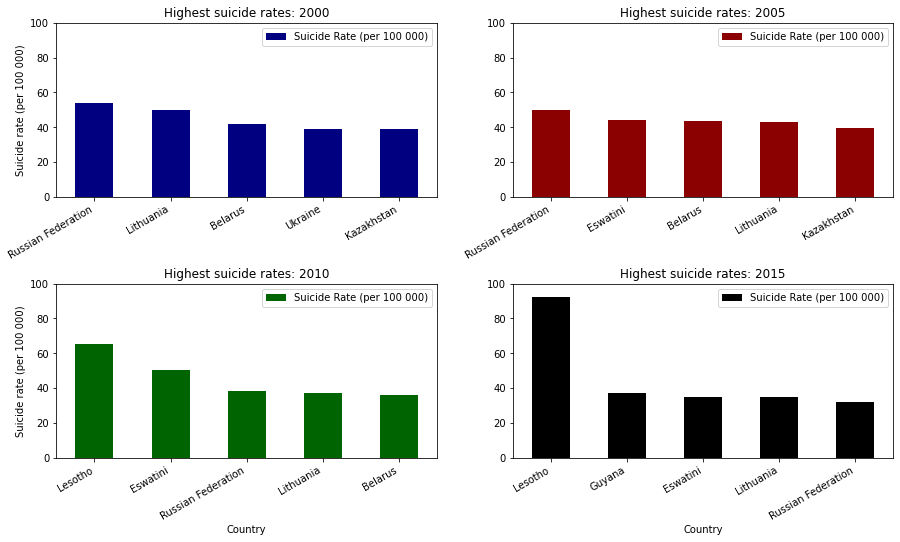

In [1870]:
fig = plt.figure(figsize=(15,8))

# create subplot for each year   
ax1 = df_2000.plot.bar(ax=fig.add_subplot(2, 2, 1), color="navy")
ax1.set_title("Highest suicide rates: 2000")
ax1.set_ylim(0, 100)
ax1.set_xlabel(None)
ax1.set_ylabel("Suicide rate (per 100 000)")
# adjust the x-axis label rotation
plt.xticks(rotation=30, ha='right');

ax2 = df_2005.plot.bar(ax=fig.add_subplot(2, 2, 2), color="darkred")
ax2.set_title("Highest suicide rates: 2005")
ax2.set_ylim(0, 100)
ax2.set_xlabel(None)
plt.xticks(rotation=30, ha='right');

ax3 = df_2010.plot.bar(ax=fig.add_subplot(2, 2, 3), color="darkgreen")
ax3.set_title("Highest suicide rates: 2010")
ax3.set_ylim(0, 100 )
ax3.set_ylabel("Suicide rate (per 100 000)")
plt.xticks(rotation = 30, ha='right');

ax4 = df_2015.plot.bar(ax=fig.add_subplot(2, 2, 4), color="black")
ax4.set_title("Highest suicide rates: 2015")
ax4.set_ylim(0, 100)
plt.xticks(rotation = 30, ha='right');
# adjust spacing of plots
plt.subplots_adjust(hspace=0.5)

From the above plots, there appears to be a trend in the countries with the highest suicide rates over the last two decades. In 2000, all the countries with the highest rates were in Europe, more specifically in Eastern Europe. Over the years this trend has continued, however Eswantini and Lesotho have also made Africa appear as a region with extremely high suicide rates as well. Lesotho has held the title of the country with the highest suicide rate in the world for the last decade. 

Suicide is a hugely sensitive and complex issue with a multitude of causes for why one would be driven to mental place where they feel like the only option is to end their own life. The very nature of a death by suicide means we can never fully know the reasons behind it. 

That said, the trend of these particular countries continuously having the highest suicide rates over several decades begs the question as to why. 

First let us look at our data from a broader perspective. We will now analyse regions as a whole because although these countries have the highest suicide rates in the world they could be outliers in their regions, so we will examine.  

## Suicide rates by region

We will use line graphs to represent the average suicide rate in each region over two decades(2000-2019). 

In [1871]:
# temporary dict to store data before we turn into df
temp_dict = {"Year": [], "Eastern Mediterranean":[], "Africa":[], "Europe":[], "South America":[], 
             "North America":[], "Western Pacific": [], "South-East Asia":[]}
# calculate average suicide rate in each region for every year: 2000-2019 and store in temp_dict
for year in year_list:
    temp_dict["Year"].append(year)
    
    temp_dict["Eastern Mediterranean"].append(round(df[(df["Year"] == year ) & (df["Region"] == "Eastern Mediterranean") & (df["Sex"] == "BTSX") & 
                                                (df["Specification"] != "AGEGROUP")]["Suicide Rate (per 100 000)"].mean(), 2))
    
    temp_dict["Africa"].append(round(df[(df["Year"] == year ) & (df["Region"] == "Africa") & (df["Sex"] == "BTSX") & 
                                                (df["Specification"] != "AGEGROUP")]["Suicide Rate (per 100 000)"].mean(), 2))
    
    temp_dict["Europe"].append(round(df[(df["Year"] == year ) & (df["Region"] == "Europe") & (df["Sex"] == "BTSX") & 
                                                (df["Specification"] != "AGEGROUP")]["Suicide Rate (per 100 000)"].mean(), 2))
    
    temp_dict["South America"].append(round(df[(df["Year"] == year ) & (df["Region"] == "South America") & (df["Sex"] == "BTSX") & 
                                                (df["Specification"] != "AGEGROUP")]["Suicide Rate (per 100 000)"].mean(), 2))
    
    temp_dict["North America"].append(round(df[(df["Year"] == year ) & (df["Region"] == "North America") & (df["Sex"] == "BTSX") & 
                                                (df["Specification"] != "AGEGROUP")]["Suicide Rate (per 100 000)"].mean(), 2))
    
    temp_dict["Western Pacific"].append(round(df[(df["Year"] == year ) & (df["Region"] == "Western Pacific") & (df["Sex"] == "BTSX") & 
                                                (df["Specification"] != "AGEGROUP")]["Suicide Rate (per 100 000)"].mean(), 2))
   
    temp_dict["South-East Asia"].append(round(df[(df["Year"] == year ) & (df["Region"] == "South-East Asia") & (df["Sex"] == "BTSX") & 
                                                (df["Specification"] != "AGEGROUP")]["Suicide Rate (per 100 000)"].mean(), 2))
    
df_reg_rate = pd.DataFrame.from_dict(temp_dict).set_index("Year")
df_reg_rate.head()

,Eastern Mediterranean,Africa,Europe,South America,North America,Western Pacific,South-East Asia
Year,,,,,,,
2000,5.55,10.93,17.37,7.69,8.23,12.34,9.49
2001,5.63,10.63,17.12,7.88,8.07,12.16,8.82
2002,5.60,10.55,16.93,8.19,8.07,12.15,8.58
2003,5.58,10.41,16.51,8.09,7.86,12.54,8.36
2004,5.53,10.38,16.21,8.09,7.95,12.50,8.26


Now we have our DataFrame of the average suicide rates in each region over two decades, we can represent it as a line graph and then analyse:  

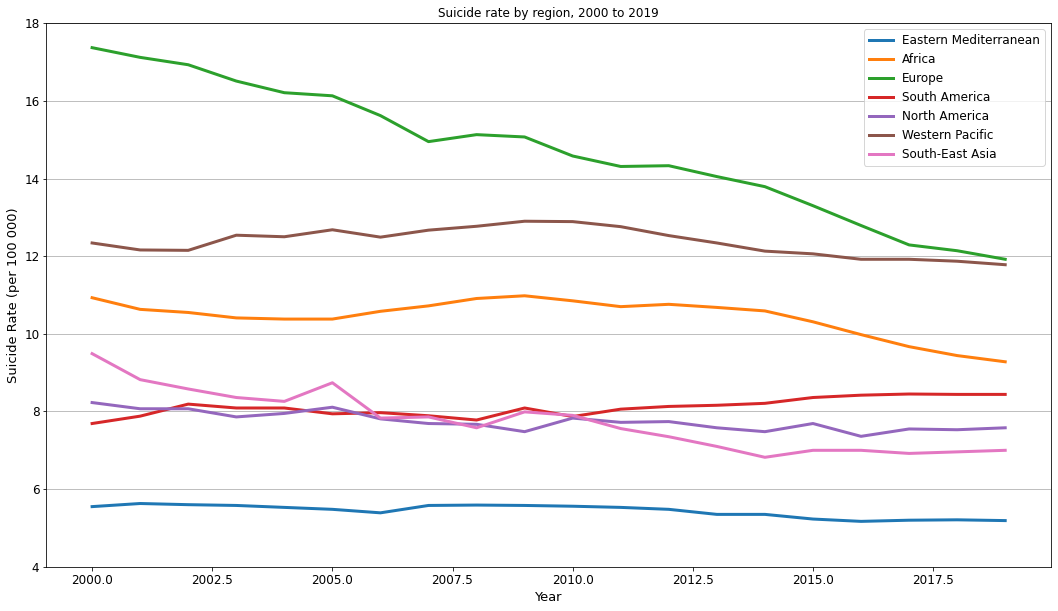

In [1872]:
ax = df_reg_rate.plot.line(figsize=(18,10), fontsize = 12, linewidth=3)
ax.set_title("Suicide rate by region, 2000 to 2019")
ax.set_ylim(4, 18)
ax.yaxis.grid(True)
ax.legend(fontsize=12)
ax.set_ylabel("Suicide Rate (per 100 000)",  fontsize = 13);
ax.set_xlabel("Year",  fontsize = 13);

From the above graph we can see that three regions have continued to have the highest suicide rates. Europe has declined in it's rate over the years, however it still remains the region with the leading number of suicides. Surpirsingly, Africa is not the ensuing region despite two of it's countries having the highest suicide rates over the last several years (Lesotho and Eswantini). Instead, the Western Pacific Region has consistently had the second highest rate. Some well known countries in this region are China, Australia, South Korea and Vietnam. Africa is then following as the region with the third highest suicide rate.

South-East Asia has seen a notable decline in suicides over the last two decades while South America has seen the opposite. Most recently in 2019, the South American nation of Guyana had 65 suicides per 100 000 people, which was the third highest in the world. 

The Eastern Mediterranean region has a significantly lower suicide rate in comparison to other regions. In this region are countries such as Saudi Arabia and the UAE which are commonly known as countries that have high-income economies.

So taking that into consideration, let's explore whether the income level of a country (e.g. high/low-income economy) has any correlation to the suicide rates in that country.

## Correlation between suicide rates and income levels of countries 

We have collected data for this specific analysis, so we can now store and represent it accordingly and then examine.

We will use four income groups: High, Upper-middle, Lower-middle and Low income economies. 

<b>Note</b>: Information and groups are provided by the World Bank.

Low-income economies are defined as those with a GNI(Gross National Income) per capita of 1,085 USD or less in 2021; lower middle-income economies are those with a GNI per capita between 1,086 USD and 4,255 USD; upper middle-income economies are those with a GNI per capita between 4,256 USD and 13,205 USD; high-income economies are those with a GNI per capita of 13,205 USD or more. - The World Bank 

In [1873]:
# lets display the suicide rate for each economy type on a bar chart (the average over two decades)

HI_rate = round(df[(df["Sex"] == "BTSX") & (df["Region"] == "High-income economies")]["Suicide Rate (per 100 000)"].mean(), 2)

UMI_rate = round(df[(df["Sex"] == "BTSX") & (df["Region"] == "Upper-middle-income economies")]["Suicide Rate (per 100 000)"].mean(), 2)

LMI_rate = round(df[(df["Sex"] == "BTSX") & (df["Region"] == "Lower-middle-income economies")]["Suicide Rate (per 100 000)"].mean(), 2)

LI_rate = round(df[(df["Sex"] == "BTSX") & (df["Region"] == "Low-income economies")]["Suicide Rate (per 100 000)"].mean(), 2)

df_eco = pd.DataFrame({"Suicide Rates (per 100 000)": [HI_rate, UMI_rate, LMI_rate, LI_rate] }, index = economic_groups )

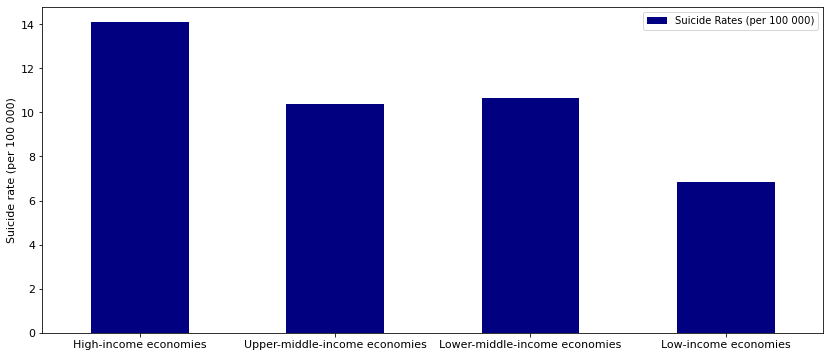

In [1874]:
# plot graph
ax = df_eco.plot.bar(figsize=(14,6), fontsize = 11, color="navy", rot = 0)
ax.set_ylabel("Suicide rate (per 100 000)", fontsize=11);

From the above bar chart there appears to be a stark correlation between high-income economies and higher suicide rates. The middle-income economies are levelled and low-income economies have the lowest rates. 

From this, we can deduce that a higher income does not equate to better mental wellbeing. This finding reinforces the adage, "money does not buy happiness" and in actuality countries where the majority a financially comfortable have the highest rates of suicide. 

This said, we must still bear in mind that there are substantially more low income than high income countries, so if we were to analyse further the reasoning for these results we would have to take that into consideration.  

## Suicide rates by gender  

Plot the rates for both sexes over time:

First, we need to get lists of values for gender related data. Then we will represent the results using a line plot:

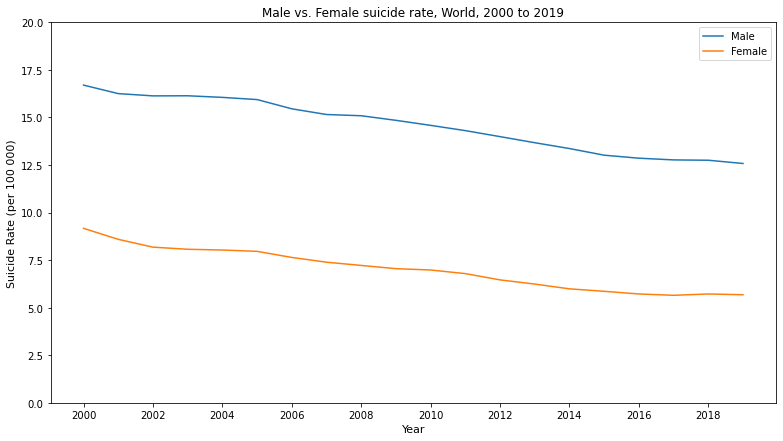

In [1876]:
# make list of years for graphs 
year = pd.to_datetime(year_list, format="%Y")

# make list of global suicide rates of men 
male_glb = df[(df["SpatialDim"] == "GLOBAL") & (df["Sex"] == "MLE")].sort_values("Year", ascending = True)
male_glb = male_glb["Suicide Rate (per 100 000)"].tolist()
# make list of global suicide rates of women 
female_glb = df[(df["SpatialDim"] == "GLOBAL") & (df["Sex"] == "FMLE")].sort_values("Year", ascending = True)
female_glb = female_glb["Suicide Rate (per 100 000)"].tolist()

# plot graph
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(year, male_glb, label="Male")
ax.plot(year, female_glb, label="Female")
ax.set_ylim(0, 20 )

ax.set_title("Male vs. Female suicide rate, World, 2000 to 2019")
ax.set_xlabel("Year", fontsize = 11)
ax.set_ylabel("Suicide Rate (per 100 000)",  fontsize = 11)
ax.legend()

From the above line graph, although the suicide rates for both men and women have been decreasing, we can clearly see that suicide has been and is still more common in men than women in all countries around the world.   

Worldwide, suicide rates in men are just over twice as high as for women. In 2016, as we see in the visualization, the global suicide rate for women was 5.72 deaths per 100,000; for men, it was over twice that figure at 12.85 per 100,000.

The reason as to why this is the case is still being study by psychologists. However, one key element for this trend could be the stigma surrounding men and vulnerability. From a young age, boys are conditioned to not express emotion, because to express emotion is to be 'weak'. As a result of this, they learn to bottle up their problems and are therefore more likely to struggle in silence. Universal phrases like "be a man" and "boys don't cry" embody the toxic expectations for men in society.

Global 2016 suicide rate of men and women:

In [1877]:
 df.drop(columns = ["Age Group", "Region", "Specification"])[(df["SpatialDim"] == "GLOBAL") & (df["Sex"] != "BTSX") & (df["Year"] == 2016)].set_index("Sex")

,Country,Year,Suicide Rate (per 100 000),SpatialDim
Sex,,,,
FMLE,None,2016,5.7200,GLOBAL
MLE,None,2016,12.8563,GLOBAL


Visualisation of the ratio of male to female suicides represented as a pie chart:

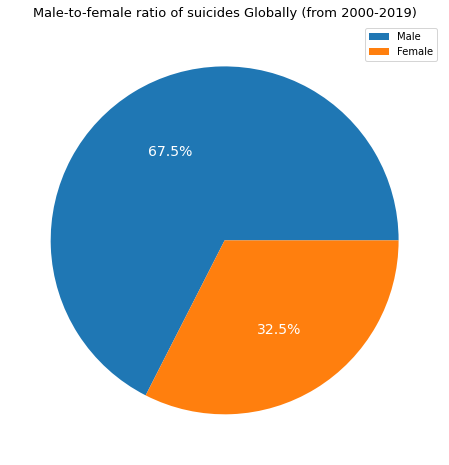

In [1878]:
male_glb = round(df[(df["SpatialDim"] == "GLOBAL") & (df["Sex"] == "MLE")]["Suicide Rate (per 100 000)"].mean(), 2)
female_glb = round(df[(df["SpatialDim"] == "GLOBAL") & (df["Sex"] == "FMLE")]["Suicide Rate (per 100 000)"].mean(), 2)

# get ratio numbers as a percentage 
total = male_glb + female_glb

male_glb = (male_glb/total) * 100
female_glb = round((female_glb/total) * 100, 1)

# make df to be used for chart 
df_gender = pd.DataFrame({"% of suicides": [male_glb, female_glb]}, index=["Male", "Female"])
# plot pie chart
ax = df_gender.plot.pie(y="% of suicides", figsize=(8, 8), autopct='%1.1f%%', fontsize = 14, textprops={'color':"w"})
ax.set_ylabel(None);
ax.set_title("Male-to-female ratio of suicides Globally (from 2000-2019)", fontsize = 13);

## Trajectory of suicide rates over the years 

Let us see if see if suicide rates have increased or decreeased over the last 20 years:

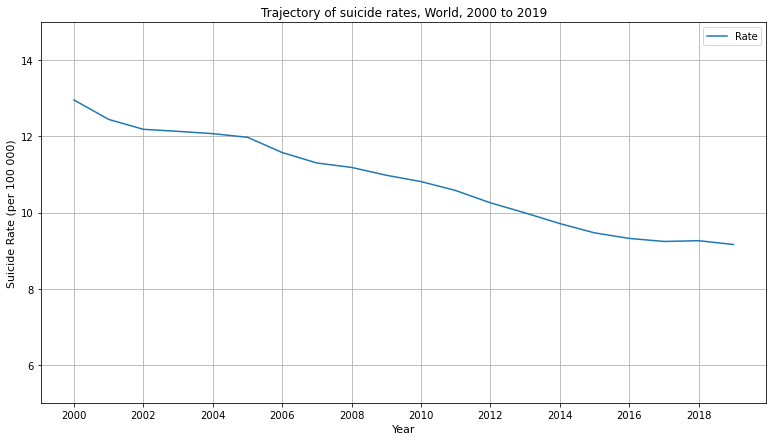

In [1879]:
# make list of years for graphs 
year = pd.to_datetime(year_list, format="%Y")

# make list of global suicide rates 
glb = df[(df["SpatialDim"] == "GLOBAL") & (df["Sex"] == "BTSX")].sort_values("Year", ascending = True)
glb = glb["Suicide Rate (per 100 000)"].tolist()

# plot graph
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(year, glb, label="Rate")
ax.set_ylim(5, 15)
ax.set_title("Trajectory of suicide rates, World, 2000 to 2019")
ax.set_xlabel("Year", fontsize = 11)
ax.set_ylabel("Suicide Rate (per 100 000)",  fontsize = 11)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.legend();

From the above line graph we can see a decrease in suicide rates fromm 2000 till 2016, however in that year it plateaus. In general though, we can definitely see this trajectory as a positive for humanity. 

## Suicide rates by age 

We will look at how the rate of suicide differs amongst various age groups (Period - 2019) 

### Regional

First we need to merge data for each age group in each region. Then we can analyse both regionally and globally.

The regions are:

In [1880]:
print(region)

['Eastern Mediterranean', 'Africa', 'Europe', 'South America', 'North America', 'Western Pacific', 'South-East Asia']


The age groups are: 15-24, 25-54, 55-74, 75+

To acquire the above age groups we will have to merge the current age groups our data is split into, then get an average for each.  

In [1881]:
age_group = df["Age Group"].unique().tolist()
# Note: some age groups are redundant, so we remove them
age_group.remove("YEARS15-19")
age_group.remove("YEARS15-29")
age_group.remove("YEARS30-49")
age_group.remove(None)
print(age_group)

['YEARS15-24', 'YEARS25-34', 'YEARS35-44', 'YEARS45-54', 'YEARS55-64', 'YEARS65-74', 'YEARS75-84', 'YEARS85PLUS']


We will use a single DataFrame to store suicide rates for all age groups in each region. 

A dict will be used to store our data before we convert it to a df:

In [1882]:
# make dict to store data, each region will contain all age groups and their respective values   
temp_dict = {"Region": [], "15-24 yrs":[], "25-54 yrs":[], "55-74 yrs":[], "75+ yrs":[]}

for x in range(len(region)):
    
    temp_dict["Region"].append(region[x])
    # make each row the mean value of each region  
    temp_dict["15-24 yrs"].append(round(df[(df["Region"]==region[x]) & (df["Sex"]=="BTSX") & 
                            (df["Age Group"]=="YEARS15-24")]["Suicide Rate (per 100 000)"].mean(), 2))

    temp_dict["25-54 yrs"].append(round(df[(df["Region"]==region[x]) & (df["Sex"]=="BTSX") & ((df["Age Group"]=="YEARS25-34")
                               |(df["Age Group"] =="YEARS35-44")|(df["Age Group"] =="YEARS45-54"))]["Suicide Rate (per 100 000)"].mean(), 2))
        
    temp_dict["55-74 yrs"].append(round(df[(df["Region"]==region[x]) & (df["Sex"]=="BTSX") & ((df["Age Group"]=="YEARS55-64")
                               |(df["Age Group"] =="YEARS65-74"))]["Suicide Rate (per 100 000)"].mean(), 2))
        
    temp_dict["75+ yrs"].append(round(df[(df["Region"]==region[x]) & (df["Sex"]=="BTSX") & ((df["Age Group"]=="YEARS75-84")
                                 |(df["Age Group"] =="YEARS85PLUS"))]["Suicide Rate (per 100 000)"].mean(), 2))

# df for all age groups in each region 
df_age_reg = pd.DataFrame.from_dict(temp_dict).set_index("Region")
df_age_reg

,15-24 yrs,25-54 yrs,55-74 yrs,75+ yrs
Region,,,,
Eastern Mediterranean,5.52,7.56,9.01,21.00
Africa,5.89,17.24,35.49,99.03
Europe,7.32,13.25,16.64,26.03
South America,10.65,10.88,11.84,16.81
North America,5.81,9.39,11.55,19.57
Western Pacific,14.99,15.79,14.75,31.33
South-East Asia,6.69,8.10,12.11,26.44


To clearly represent the average suicide rate for all age groups in each region we will use bar plots: 

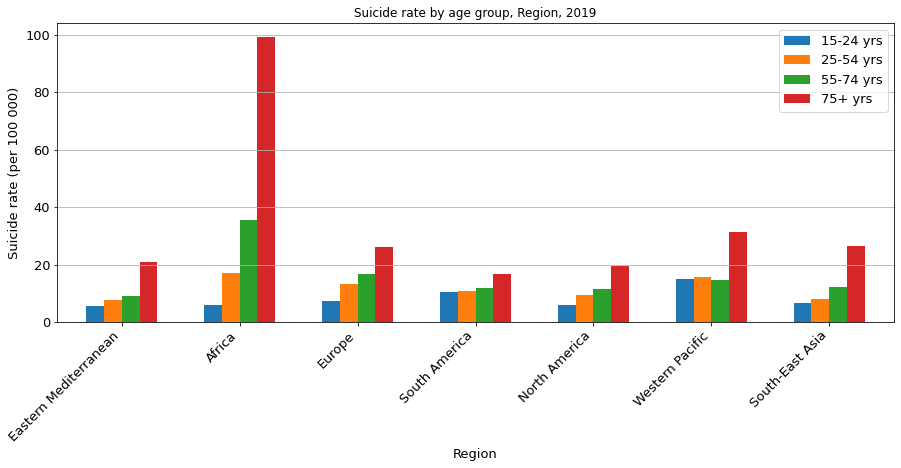

In [1883]:
ax = df_age_reg.plot.bar(figsize=(15,5.5), width=0.6, fontsize = 13)
ax.set_title("Suicide rate by age group, Region, 2019")
ax.set_ylabel("Suicide rate (per 100 000)", fontsize=13)
ax.set_xlabel("Region", fontsize=13)
ax.legend(fontsize=13)
# adjust the x-axis label rotation
plt.xticks(rotation=45, ha='right');
ax.yaxis.grid(True)

It may be general knowledge to most that suicide is one of the leading causes of death in young people.

However this does not necessarily mean suicide is more likely to occur in young people than old. It is largely a reflection of the fact that older populations also die from many other causes in comparison to their younger, fitter counterparts. The causes of death in people aged 75 years and older are mostly from cardiovascular diseases, cancers, dementia and respiratory diseases. The number of suicides are still highest amongst all demographics, but lower than other causes. 

We can see this truth reflected in the above chart. The same general trend from region to region follows. The extreme case being the number of suicides of older people in Africa. This skewe is largely due to the suicide rate in several Southern African nations like Lesotho and Eswantini which from previous charts we know have the highest suicide rates in the world. 

As to why older people commit suicide more than other age groups, proffessionals believe that loneliness is possibly a leading cause.  

### Global

Suicide rate by age on a global scale: 

In [1884]:
# get average suicide rate for each demographic 
yrs15_24 = round(df_age_reg["15-24 yrs"].mean(), 2)
yrs25_54 = round(df_age_reg["25-54 yrs"].mean(), 2) 
yrs55_74 = round(df_age_reg["55-74 yrs"].mean(), 2) 
yrs75plus = round(df_age_reg["75+ yrs"].mean(), 2) 
# store data in df for chart 
df_age_glb = pd.DataFrame({"Group": ["15-24 yrs", "25-54 yrs", "55-74 yrs", "75+ yrs"],
                           "Suicide Rate": [yrs15_24, yrs25_54, yrs55_74, yrs75plus]})

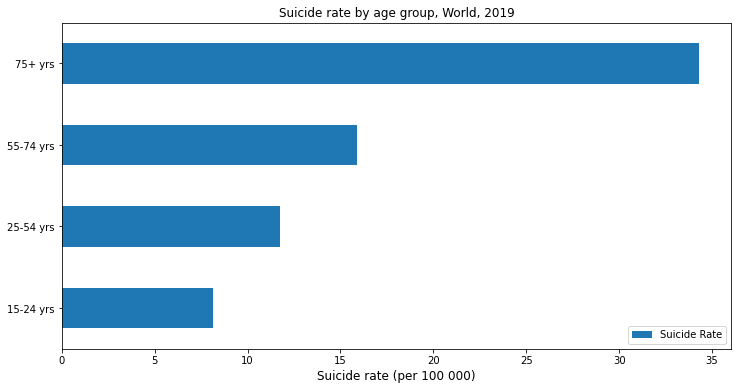

In [1885]:
ax = df_age_glb.plot.barh(x="Group", y="Suicide Rate", figsize=(12,6)) 
ax.set_xlabel("Suicide rate (per 100 000)", fontsize=12); 
ax.set_ylabel(None);
ax.set_title("Suicide rate by age group, World, 2019");

This graph showing global figures for 2019 corresponds with the analysis given in the regional section.

## Conclusions

In this assignment we analysed the suicide rates over two decades (2000-2019) using the information of 183 countries. We focused particularly on the sex, age, country, region and economic standing of the individuals that committed suicide. 

Some surprising discoveries were made, such as in all parts of the world the rate of suicide amongst men is at least 3 times higher than women. 

Another interesting finding was the clear correlation between high-income countries and higher rates of suicide. Some may say this news is no surprise, however for many, it is still quite thought-provoking information that people who have what many chase to find happiness, still die by suicide more than those who don't have it. 

A challenging aspect of using this particular Suicide Rate WHO API was the fact that the neither the country name or the region was included in the initial dataset (only the country code). As a result, I had to collect and use other datasets to match the country code to the country and then to the region which in turn lead to decent amount of data preprocessing as many mergers of raw data were required.

A number of appealing avenues could be considered for further analysis of this data:
- The analysis could be extended to integrate an API that gets the 'Happiness Ranking' of each country and examine if there is a direct correlation between happy countries and low suicide rates. 
- Another avenue would be the integration of historical suicide data and explore if the growth in social media usage has caused increase in this generation self-consciousness and thus higher suicide rates in that demographic. 
- Data included about the average consumption of alcohol in each country and whether it plays a part in how high each country ranks on the list of suicide rates.  